In [3]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


In [4]:
# Load the Iris dataset
iris_data = load_iris(return_X_y=False, as_frame=False)

# Now you can access the data, target, feature names, etc.
data = iris_data.data
target = iris_data.target
feature_names = iris_data.feature_names


In [5]:
print(feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


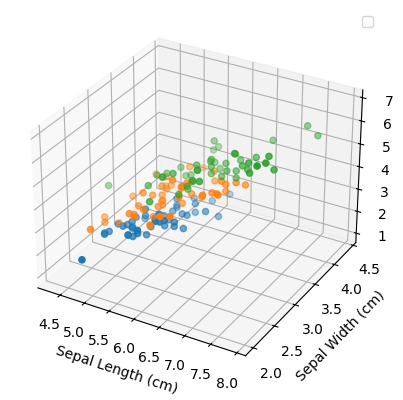

In [6]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Scatter plot
for t in np.unique(target):
    indices = target == t
    ax.scatter(data[indices, 0], data[indices, 1], data[indices, 2])

# Add labels
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [7]:

class MyPCA:
    def __init__(self, n_components: int = 2, method: str = 'svd') -> None:
        '''
        The constructor of the PCA algorithm.
        :param n_components: int, default = 2
            The dimension to which the data will be reduced.
        :param method: str, default = 'svd'
            The method used by PCA to reduce the dimensionality of the data.
        '''
        self.__n_components = n_components
        if method in ['svd', 'eigen']:
            self.__method = method
        else:
            raise ValueError(f"'{method}' is not a method implemented in this model")

    def fit(self, X: np.ndarray):
        '''
        The fitting method.
        :param X: np.ndarray
            The data on which we want to fit the PCA
        '''
        if self.__method == 'svd':
            U, S, V = np.linalg.svd(X)
            self.__V = V[:self.__n_components, :]
        elif self.__method == 'eigen':
            corr_mat = np.corrcoef(X.T)
            # Getting the eigenvectors and eigenvalues
            self.eig_vals, self.eig_vecs = np.linalg.eig(corr_mat)
            # Sorting the list of tuples (eigenvalue, eigenvector)
            self.eig_pairs = [(np.abs(self.eig_vals[i]), self.eig_vecs[:, i]) for i in range(len(self.eig_vals))]
            self.eig_pairs.sort(key=lambda x: x[0], reverse=True)
            # Calculating the explained ratio
            total = sum(self.eig_vals)
            self.explained_variance_ratio = [(i / total) * 100 for i in sorted(self.eig_vals, reverse=True)]
            self.cumulative_variance_ratio = np.cumsum(self.explained_variance_ratio)
            # Creating the projection matrix
            self.matrix_w = np.hstack((self.eig_pairs[i][1].reshape(np.size(X, 1), 1) for i in range(self.__n_components)))
        return self

    def transform(self, X: np.ndarray) -> np.ndarray:
        '''
        The transform function.
        :param X: np.ndarray
            The data that we must reduce.
        '''
        if self.__method == 'svd':
            return X.dot(self.__V.T)
        elif self.__method == 'eigen':
            return X.dot(self.matrix_w)


In [14]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler on the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)



In [24]:

# Create instances of Scratch-made PCA using eigenvector and SVD algorithms
scratch_pca_eigenvector = MyPCA(n_components=2, method = 'eigen')
scratch_pca_svd = MyPCA(n_components=2, method = 'svd')
# Create an instance of sklearn PCA
sklearn_pca = PCA(n_components=2)

# Train all instances of PCA on the iris data
reduced_data_scratch_eigenvector = scratch_pca_eigenvector.fit(X_scaled).transform(X_scaled)
reduced_data_scratch_svd = scratch_pca_svd.fit(X_scaled).transform(X_scaled)
reduced_data_sklearn = sklearn_pca.fit_transform(X_scaled)


TypeError: arrays to stack must be passed as a "sequence" type such as list or tuple.

NameError: name 'reduced_data_scratch_eigenvector' is not defined

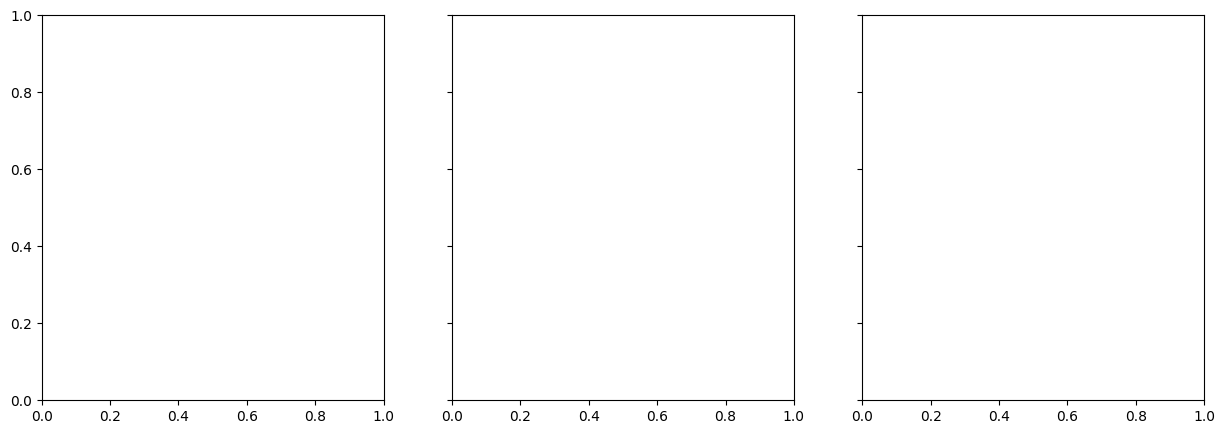

In [20]:

# Create a plot that combines 3 scatter plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

# Plot each result Data Set in a separate window
for ax, reduced_data, title in zip(axes, [reduced_data_scratch_eigenvector, reduced_data_scratch_svd, reduced_data_sklearn], ['Scratch (Eigenvector)', 'Scratch (SVD)', 'Scikit-Learn']):
    ax.scatter(reduced_data[:, 0], reduced_data[:, 1], c=iris_data['target'], cmap='viridis', marker='o')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(title)

plt.tight_layout()
plt.show()

# Retrain sklearn PCA model on the iris Data Set with n_components set to 1
sklearn_pca_1d = PCA(n_components=1)
reduced_data_sklearn_1d = sklearn_pca_1d.fit_transform(X_scaled)




In [28]:
# Create a line plot of the explained variance ratio
explained_variance_ratio = sklearn_pca_1d.explained_variance_ratio_
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio for PCA (1D)')
plt.show()

NameError: name 'sklearn_pca_1d' is not defined